In [1]:
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img, img_to_array, array_to_img
from keras.layers import Conv2D, Flatten, MaxPooling2D, Dense
from keras.models import Sequential
import glob, os, random

C:\Users\eslam\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
base_path = 'garbage_dataset'

img_list = glob.glob(os.path.join(base_path, '*/*.jpg'))

print(len(img_list))

15515


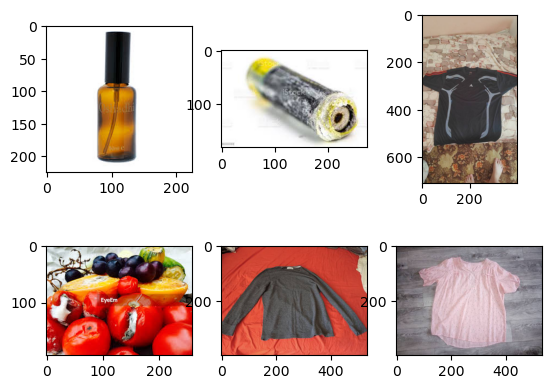

In [3]:
for i, img_path in enumerate(random.sample(img_list, 6)):
    img = load_img(img_path)
    img = img_to_array(img, dtype=np.uint8)

    plt.subplot(2, 3, i+1)
    plt.imshow(img.squeeze())

In [4]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.1
)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1
)

train_generator = train_datagen.flow_from_directory(
    base_path,
    target_size=(300, 300),
    batch_size=16,
    class_mode='categorical',
    subset='training',
    seed=0
)

validation_generator = test_datagen.flow_from_directory(
    base_path,
    target_size=(300, 300),
    batch_size=16,
    class_mode='categorical',
    subset='validation',
    seed=0
)

labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())

print(labels)

Found 13977 images belonging to 12 classes.
Found 1546 images belonging to 12 classes.
{0: 'battery', 1: 'biological', 2: 'brown-glass', 3: 'cardboard', 4: 'clothes', 5: 'green-glass', 6: 'metal', 7: 'paper', 8: 'plastic', 9: 'shoes', 10: 'trash', 11: 'white-glass'}


In [5]:
model = Sequential([
    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(300, 300, 3)),
    MaxPooling2D(pool_size=2),

    Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),
    
    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),
    
    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),

    Flatten(),

    Dense(64, activation='relu'),

    Dense(12, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

model.summary()

C:\Users\eslam\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 300, 300, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 150, 150, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 150, 150, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 75, 75, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 37, 37, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 37, 37, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 18, 18, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 10368)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         663,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 12)                  │             780 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 711,500 (2.71 MB)

 Trainable params: 711,500 (2.71 MB)

 Non-trainable params: 0 (0.00 B)

# Take a Shot

In [6]:
model.fit(train_generator, epochs=20, validation_data=validation_generator)

Epoch 1/20


C:\Users\eslam\anaconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


874/874 ━━━━━━━━━━━━━━━━━━━━ 595s 676ms/step - acc: 0.4184 - loss: 1.7997 - val_acc: 0.5188 - val_loss: 1.4293
Epoch 2/20
874/874 ━━━━━━━━━━━━━━━━━━━━ 511s 582ms/step - acc: 0.5764 - loss: 1.2395 - val_acc: 0.5692 - val_loss: 1.2855
Epoch 3/20
874/874 ━━━━━━━━━━━━━━━━━━━━ 513s 584ms/step - acc: 0.6260 - loss: 1.1129 - val_acc: 0.5712 - val_loss: 1.3252
Epoch 4/20
874/874 ━━━━━━━━━━━━━━━━━━━━ 509s 580ms/step - acc: 0.6465 - loss: 1.0506 - val_acc: 0.6300 - val_loss: 1.1094
Epoch 5/20
874/874 ━━━━━━━━━━━━━━━━━━━━ 507s 577ms/step - acc: 0.6846 - loss: 0.9518 - val_acc: 0.6151 - val_loss: 1.2004
Epoch 6/20
874/874 ━━━━━━━━━━━━━━━━━━━━ 511s 582ms/step - acc: 0.6821 - loss: 0.9328 - val_acc: 0.6759 - val_loss: 0.9898
Epoch 7/20
874/874 ━━━━━━━━━━━━━━━━━━━━ 507s 578ms/step - acc: 0.6992 - loss: 0.9010 - val_acc: 0.6656 - val_loss: 1.0315
Epoch 8/20
874/874 ━━━━━━━━━━━━━━━━━━━━ 507s 577ms/step - acc: 0.7056 - loss: 0.8914 - val_acc: 0.6662 - val_loss: 1.0508
Epoch 9/20
874/874 ━━━━━━━━━━━━━━━━

# Another Shot

In [8]:
model.fit(train_generator, epochs=20, validation_data=validation_generator)

Epoch 1/20
874/874 ━━━━━━━━━━━━━━━━━━━━ 509s 580ms/step - acc: 0.7767 - loss: 0.6675 - val_acc: 0.7290 - val_loss: 0.8578
Epoch 2/20
874/874 ━━━━━━━━━━━━━━━━━━━━ 512s 583ms/step - acc: 0.7747 - loss: 0.6657 - val_acc: 0.7413 - val_loss: 0.8071
Epoch 3/20
874/874 ━━━━━━━━━━━━━━━━━━━━ 506s 577ms/step - acc: 0.7809 - loss: 0.6651 - val_acc: 0.7510 - val_loss: 0.8045
Epoch 4/20
874/874 ━━━━━━━━━━━━━━━━━━━━ 506s 577ms/step - acc: 0.7828 - loss: 0.6455 - val_acc: 0.7270 - val_loss: 0.8962
Epoch 5/20
874/874 ━━━━━━━━━━━━━━━━━━━━ 509s 580ms/step - acc: 0.7850 - loss: 0.6369 - val_acc: 0.7451 - val_loss: 0.7936
Epoch 6/20
874/874 ━━━━━━━━━━━━━━━━━━━━ 506s 576ms/step - acc: 0.7922 - loss: 0.6219 - val_acc: 0.7451 - val_loss: 0.8362
Epoch 7/20
874/874 ━━━━━━━━━━━━━━━━━━━━ 513s 584ms/step - acc: 0.7948 - loss: 0.6065 - val_acc: 0.7464 - val_loss: 0.8072
Epoch 8/20
874/874 ━━━━━━━━━━━━━━━━━━━━ 515s 587ms/step - acc: 0.7945 - loss: 0.6026 - val_acc: 0.7510 - val_loss: 0.8135
Epoch 9/20
874/874 ━━━━━

In [9]:
model.fit(train_generator, epochs=20, validation_data=validation_generator)

Epoch 1/20
874/874 ━━━━━━━━━━━━━━━━━━━━ 507s 577ms/step - acc: 0.8240 - loss: 0.5277 - val_acc: 0.7781 - val_loss: 0.7851
Epoch 2/20
874/874 ━━━━━━━━━━━━━━━━━━━━ 506s 576ms/step - acc: 0.8214 - loss: 0.5267 - val_acc: 0.7755 - val_loss: 0.7501
Epoch 3/20
874/874 ━━━━━━━━━━━━━━━━━━━━ 509s 580ms/step - acc: 0.8262 - loss: 0.5095 - val_acc: 0.7807 - val_loss: 0.7124
Epoch 4/20
874/874 ━━━━━━━━━━━━━━━━━━━━ 505s 575ms/step - acc: 0.8312 - loss: 0.5169 - val_acc: 0.7827 - val_loss: 0.6975
Epoch 5/20
874/874 ━━━━━━━━━━━━━━━━━━━━ 512s 583ms/step - acc: 0.8223 - loss: 0.5318 - val_acc: 0.7542 - val_loss: 0.8085
Epoch 6/20
874/874 ━━━━━━━━━━━━━━━━━━━━ 509s 580ms/step - acc: 0.8301 - loss: 0.5026 - val_acc: 0.7749 - val_loss: 0.7421
Epoch 7/20
874/874 ━━━━━━━━━━━━━━━━━━━━ 598s 682ms/step - acc: 0.8273 - loss: 0.5120 - val_acc: 0.7768 - val_loss: 0.7667
Epoch 8/20
874/874 ━━━━━━━━━━━━━━━━━━━━ 630s 716ms/step - acc: 0.8321 - loss: 0.5013 - val_acc: 0.7697 - val_loss: 0.7957
Epoch 9/20
874/874 ━━━━━

In [10]:
model.fit(train_generator, epochs=20, validation_data=validation_generator)

Epoch 1/20
874/874 ━━━━━━━━━━━━━━━━━━━━ 513s 584ms/step - acc: 0.8389 - loss: 0.4834 - val_acc: 0.7678 - val_loss: 0.7888
Epoch 2/20
874/874 ━━━━━━━━━━━━━━━━━━━━ 513s 584ms/step - acc: 0.8484 - loss: 0.4602 - val_acc: 0.7891 - val_loss: 0.7106
Epoch 3/20
874/874 ━━━━━━━━━━━━━━━━━━━━ 515s 587ms/step - acc: 0.8418 - loss: 0.4731 - val_acc: 0.7878 - val_loss: 0.7189
Epoch 4/20
874/874 ━━━━━━━━━━━━━━━━━━━━ 511s 582ms/step - acc: 0.8485 - loss: 0.4533 - val_acc: 0.7878 - val_loss: 0.7179
Epoch 5/20
874/874 ━━━━━━━━━━━━━━━━━━━━ 511s 582ms/step - acc: 0.8506 - loss: 0.4546 - val_acc: 0.7827 - val_loss: 0.7401
Epoch 6/20
874/874 ━━━━━━━━━━━━━━━━━━━━ 512s 583ms/step - acc: 0.8487 - loss: 0.4492 - val_acc: 0.7859 - val_loss: 0.7552
Epoch 7/20
874/874 ━━━━━━━━━━━━━━━━━━━━ 513s 584ms/step - acc: 0.8479 - loss: 0.4583 - val_acc: 0.7840 - val_loss: 0.7845
Epoch 8/20
874/874 ━━━━━━━━━━━━━━━━━━━━ 515s 586ms/step - acc: 0.8438 - loss: 0.4662 - val_acc: 0.7678 - val_loss: 0.7768
Epoch 9/20
874/874 ━━━━━

In [11]:
model.fit(train_generator, epochs=20, validation_data=validation_generator)

Epoch 1/20
874/874 ━━━━━━━━━━━━━━━━━━━━ 567s 646ms/step - acc: 0.8566 - loss: 0.4298 - val_acc: 0.7768 - val_loss: 0.8337
Epoch 2/20
874/874 ━━━━━━━━━━━━━━━━━━━━ 658s 750ms/step - acc: 0.8560 - loss: 0.4328 - val_acc: 0.8001 - val_loss: 0.7069
Epoch 3/20
874/874 ━━━━━━━━━━━━━━━━━━━━ 762s 869ms/step - acc: 0.8558 - loss: 0.4332 - val_acc: 0.7969 - val_loss: 0.7562
Epoch 4/20
874/874 ━━━━━━━━━━━━━━━━━━━━ 761s 868ms/step - acc: 0.8600 - loss: 0.4085 - val_acc: 0.7859 - val_loss: 0.7870
Epoch 5/20
874/874 ━━━━━━━━━━━━━━━━━━━━ 600s 683ms/step - acc: 0.8548 - loss: 0.4245 - val_acc: 0.8118 - val_loss: 0.7180
Epoch 6/20
874/874 ━━━━━━━━━━━━━━━━━━━━ 610s 695ms/step - acc: 0.8544 - loss: 0.4245 - val_acc: 0.7814 - val_loss: 0.7890
Epoch 7/20
874/874 ━━━━━━━━━━━━━━━━━━━━ 523s 596ms/step - acc: 0.8667 - loss: 0.4024 - val_acc: 0.7788 - val_loss: 0.7842
Epoch 8/20
874/874 ━━━━━━━━━━━━━━━━━━━━ 593s 676ms/step - acc: 0.8624 - loss: 0.4129 - val_acc: 0.7943 - val_loss: 0.7604
Epoch 9/20
874/874 ━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


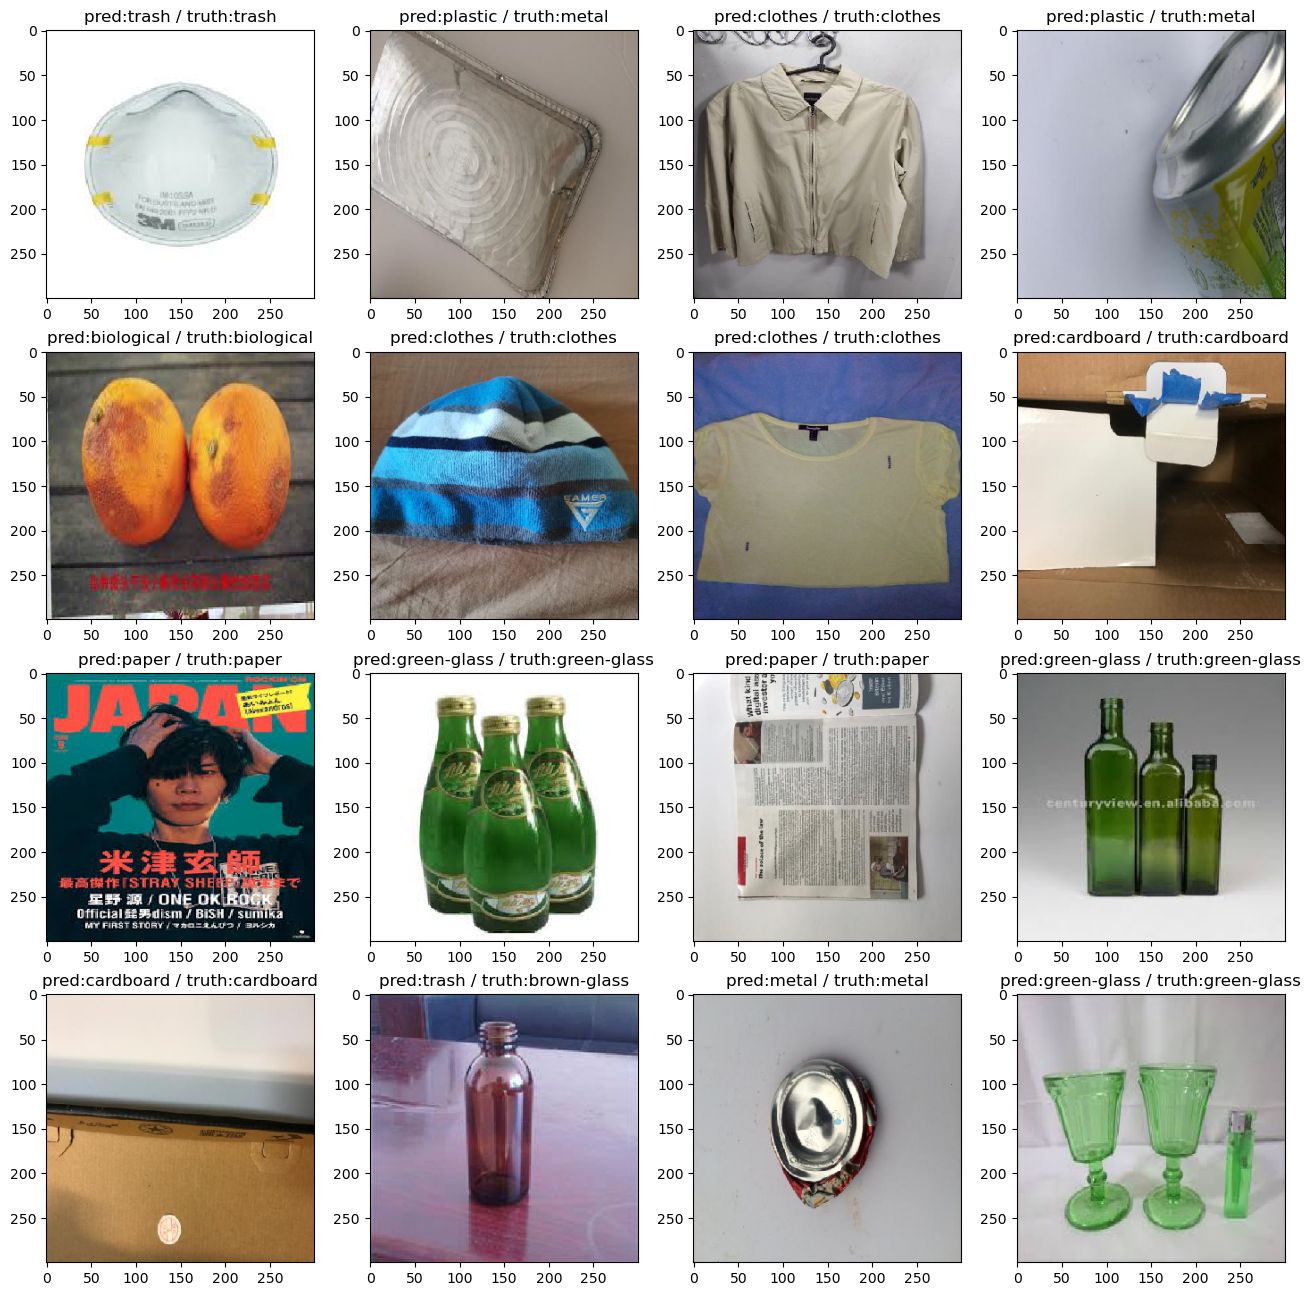

In [12]:
test_x, test_y = validation_generator.__getitem__(1)

preds = model.predict(test_x)

plt.figure(figsize=(16, 16))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.title('pred:%s / truth:%s' % (labels[np.argmax(preds[i])], labels[np.argmax(test_y[i])]))
    plt.imshow(test_x[i])

In [21]:
model.fit(train_generator, epochs=20, validation_data=validation_generator)

Epoch 1/20
874/874 ━━━━━━━━━━━━━━━━━━━━ 530s 604ms/step - acc: 0.8628 - loss: 0.4053 - val_acc: 0.8040 - val_loss: 0.7786
Epoch 2/20
874/874 ━━━━━━━━━━━━━━━━━━━━ 529s 602ms/step - acc: 0.8709 - loss: 0.3887 - val_acc: 0.7904 - val_loss: 0.7530
Epoch 3/20
874/874 ━━━━━━━━━━━━━━━━━━━━ 528s 601ms/step - acc: 0.8614 - loss: 0.3972 - val_acc: 0.7859 - val_loss: 0.7472
Epoch 4/20
874/874 ━━━━━━━━━━━━━━━━━━━━ 534s 608ms/step - acc: 0.8730 - loss: 0.3794 - val_acc: 0.7814 - val_loss: 0.8518
Epoch 5/20
874/874 ━━━━━━━━━━━━━━━━━━━━ 527s 600ms/step - acc: 0.8649 - loss: 0.4037 - val_acc: 0.7995 - val_loss: 0.7263
Epoch 6/20
874/874 ━━━━━━━━━━━━━━━━━━━━ 527s 600ms/step - acc: 0.8585 - loss: 0.4172 - val_acc: 0.8066 - val_loss: 0.7248
Epoch 7/20
874/874 ━━━━━━━━━━━━━━━━━━━━ 580s 661ms/step - acc: 0.8713 - loss: 0.3843 - val_acc: 0.7982 - val_loss: 0.7719
Epoch 8/20
874/874 ━━━━━━━━━━━━━━━━━━━━ 628s 716ms/step - acc: 0.8652 - loss: 0.3918 - val_acc: 0.7982 - val_loss: 0.7356
Epoch 9/20
874/874 ━━━━━

In [22]:
 model.fit(train_generator, epochs=20, validation_data=validation_generator)

Epoch 1/20
874/874 ━━━━━━━━━━━━━━━━━━━━ 545s 621ms/step - acc: 0.8666 - loss: 0.3986 - val_acc: 0.7814 - val_loss: 0.8559
Epoch 2/20
874/874 ━━━━━━━━━━━━━━━━━━━━ 537s 612ms/step - acc: 0.8733 - loss: 0.3779 - val_acc: 0.7956 - val_loss: 0.7691
Epoch 3/20
874/874 ━━━━━━━━━━━━━━━━━━━━ 536s 611ms/step - acc: 0.8762 - loss: 0.3668 - val_acc: 0.8008 - val_loss: 0.7371
Epoch 4/20
874/874 ━━━━━━━━━━━━━━━━━━━━ 536s 611ms/step - acc: 0.8756 - loss: 0.3708 - val_acc: 0.8137 - val_loss: 0.7398
Epoch 5/20
874/874 ━━━━━━━━━━━━━━━━━━━━ 539s 614ms/step - acc: 0.8773 - loss: 0.3592 - val_acc: 0.8014 - val_loss: 0.7324
Epoch 6/20
874/874 ━━━━━━━━━━━━━━━━━━━━ 535s 610ms/step - acc: 0.8751 - loss: 0.3687 - val_acc: 0.7898 - val_loss: 0.7823
Epoch 7/20
874/874 ━━━━━━━━━━━━━━━━━━━━ 539s 614ms/step - acc: 0.8724 - loss: 0.3805 - val_acc: 0.8001 - val_loss: 0.7536
Epoch 8/20
874/874 ━━━━━━━━━━━━━━━━━━━━ 538s 613ms/step - acc: 0.8659 - loss: 0.3994 - val_acc: 0.7956 - val_loss: 0.7505
Epoch 9/20
874/874 ━━━━━

In [23]:
model.fit(train_generator, epochs=20, validation_data=validation_generator)

Epoch 1/20
874/874 ━━━━━━━━━━━━━━━━━━━━ 540s 616ms/step - acc: 0.8800 - loss: 0.3461 - val_acc: 0.8072 - val_loss: 0.7745
Epoch 2/20
874/874 ━━━━━━━━━━━━━━━━━━━━ 539s 615ms/step - acc: 0.8847 - loss: 0.3456 - val_acc: 0.7969 - val_loss: 0.8256
Epoch 3/20
874/874 ━━━━━━━━━━━━━━━━━━━━ 543s 618ms/step - acc: 0.8900 - loss: 0.3337 - val_acc: 0.7930 - val_loss: 0.8410
Epoch 4/20
874/874 ━━━━━━━━━━━━━━━━━━━━ 538s 612ms/step - acc: 0.8738 - loss: 0.3735 - val_acc: 0.7691 - val_loss: 0.8393
Epoch 5/20
874/874 ━━━━━━━━━━━━━━━━━━━━ 538s 613ms/step - acc: 0.8746 - loss: 0.3600 - val_acc: 0.8111 - val_loss: 0.8189
Epoch 6/20
874/874 ━━━━━━━━━━━━━━━━━━━━ 539s 614ms/step - acc: 0.8769 - loss: 0.3697 - val_acc: 0.7801 - val_loss: 0.8050
Epoch 7/20
874/874 ━━━━━━━━━━━━━━━━━━━━ 541s 617ms/step - acc: 0.8678 - loss: 0.3806 - val_acc: 0.7846 - val_loss: 0.8146
Epoch 8/20
874/874 ━━━━━━━━━━━━━━━━━━━━ 542s 617ms/step - acc: 0.8852 - loss: 0.3451 - val_acc: 0.7820 - val_loss: 0.7968
Epoch 9/20
874/874 ━━━━━

In [25]:
loss, acc = model.evaluate(test_x, test_y, verbose=2)

1/1 - 0s - 178ms/step - acc: 0.8125 - loss: 1.2194


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


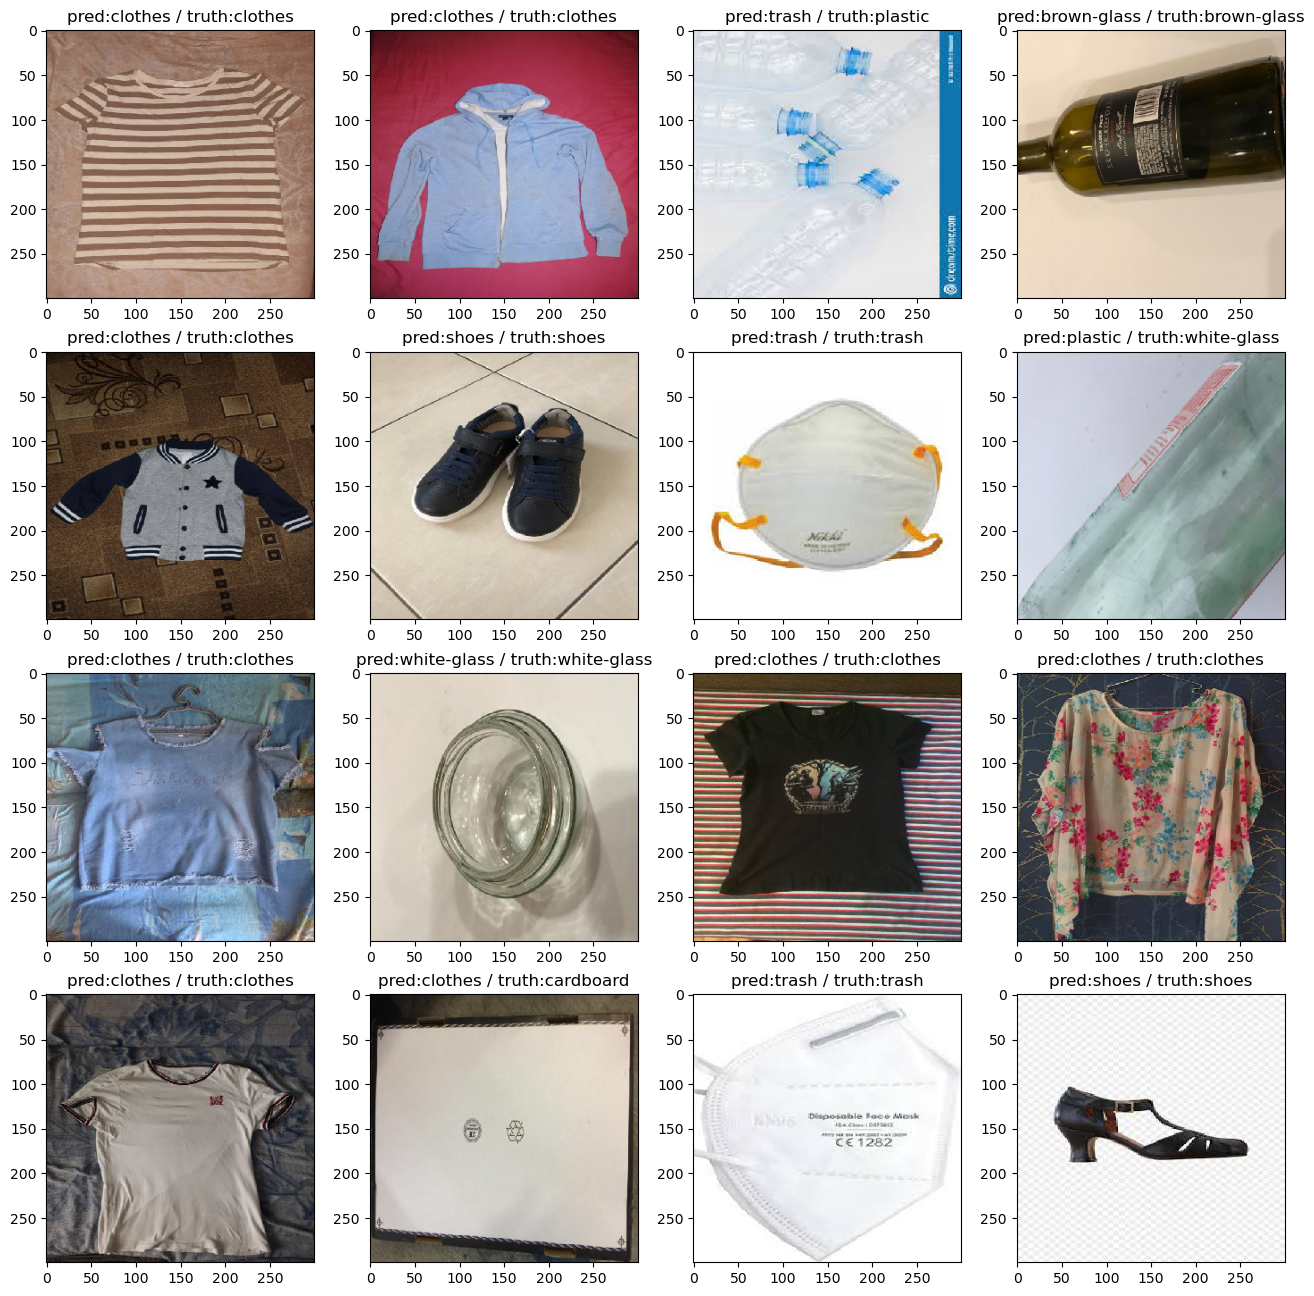

In [26]:
test_x, test_y = validation_generator.__getitem__(1)

preds = model.predict(test_x)

plt.figure(figsize=(16, 16))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.title('pred:%s / truth:%s' % (labels[np.argmax(preds[i])], labels[np.argmax(test_y[i])]))
    plt.imshow(test_x[i])

In [30]:
result = model.fit(train_generator, epochs=20, validation_data=validation_generator)

Epoch 1/20
874/874 ━━━━━━━━━━━━━━━━━━━━ 687s 784ms/step - acc: 0.8871 - loss: 0.3489 - val_acc: 0.8105 - val_loss: 0.7737
Epoch 2/20
874/874 ━━━━━━━━━━━━━━━━━━━━ 739s 843ms/step - acc: 0.8798 - loss: 0.3488 - val_acc: 0.7988 - val_loss: 0.8016
Epoch 3/20
874/874 ━━━━━━━━━━━━━━━━━━━━ 608s 693ms/step - acc: 0.8821 - loss: 0.3500 - val_acc: 0.7988 - val_loss: 0.7577
Epoch 4/20
874/874 ━━━━━━━━━━━━━━━━━━━━ 546s 621ms/step - acc: 0.8808 - loss: 0.3543 - val_acc: 0.7885 - val_loss: 0.8400
Epoch 5/20
874/874 ━━━━━━━━━━━━━━━━━━━━ 537s 612ms/step - acc: 0.8852 - loss: 0.3318 - val_acc: 0.8014 - val_loss: 0.8131
Epoch 6/20
874/874 ━━━━━━━━━━━━━━━━━━━━ 537s 611ms/step - acc: 0.8781 - loss: 0.3600 - val_acc: 0.7827 - val_loss: 0.8595
Epoch 7/20
874/874 ━━━━━━━━━━━━━━━━━━━━ 539s 614ms/step - acc: 0.8840 - loss: 0.3420 - val_acc: 0.7962 - val_loss: 0.7235
Epoch 8/20
874/874 ━━━━━━━━━━━━━━━━━━━━ 545s 620ms/step - acc: 0.8775 - loss: 0.3462 - val_acc: 0.7995 - val_loss: 0.8459
Epoch 9/20
874/874 ━━━━━

In [40]:
loss, acc = model.evaluate(test_x, test_y, verbose=2)

1/1 - 0s - 382ms/step - acc: 0.9375 - loss: 0.3243


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


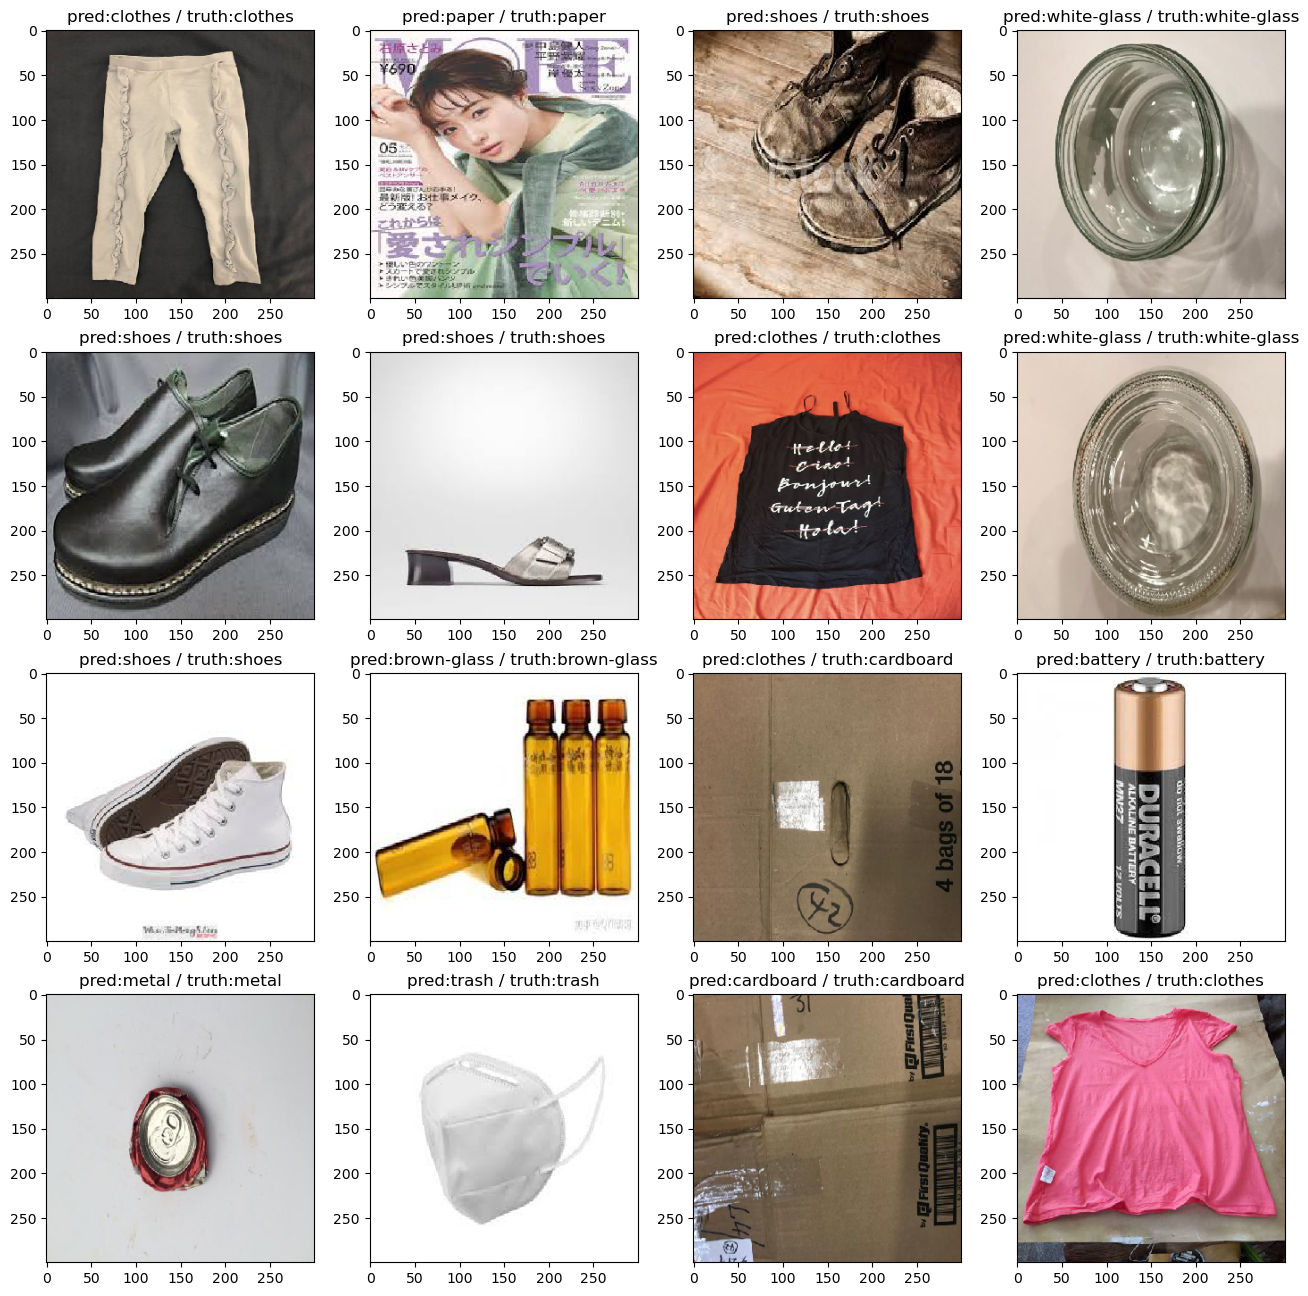

In [41]:
 test_x, test_y = validation_generator.__getitem__(1)

preds = model.predict(test_x)

plt.figure(figsize=(16, 16))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.title('pred:%s / truth:%s' % (labels[np.argmax(preds[i])], labels[np.argmax(test_y[i])]))
    plt.imshow(test_x[i])

In [42]:
model.save(os.path.join('models','cnn_garbage_classifier.h5'))

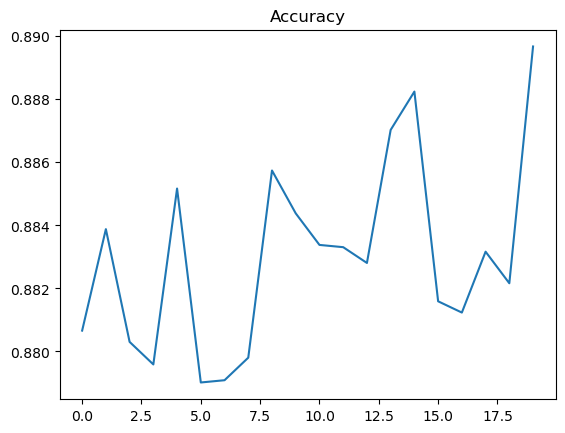

In [43]:
plt.title("Accuracy")
plt.plot(result.history["acc"])
plt.show()